In [ ]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# This line allows the notebook to find your loader.py file in the parent directory
sys.path.append('..')
from loader import load_heart_disease_datasets, preprocess_heart_disease_data

# Load and preprocess the data, pointing to the new 'data' folder
combined_df, _ = load_heart_disease_datasets(data_folder='data')
X, y, info = preprocess_heart_disease_data(combined_df)

print("Data loaded successfully!")
print("Features shape:", X.shape)
print("Target shape:", y.shape)

In [14]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (736, 16)
Testing set shape: (184, 16)


In [15]:
from sklearn.preprocessing import StandardScaler

# Identify the original numerical columns from your dataset
# Note: These are the columns before any one-hot encoding was applied
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Use the SAME fitted scaler to transform the test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nNumerical features scaled successfully.")
print("First 5 rows of scaled training data:")
print(X_train.head())


Numerical features scaled successfully.
First 5 rows of scaled training data:
          age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
640 -0.063147  1.0  3.0  1.560270 -1.857816  0.0      2.0 -0.627205    1.0   
743  2.180526  1.0  3.0 -0.116411 -1.857816  0.0      0.0  0.087627    0.0   
890 -0.063147  1.0  4.0 -0.451747  0.382627  0.0      0.0 -0.627205    1.0   
270  0.791586  1.0  4.0  0.442483  0.050710  0.0      2.0  0.008202    1.0   
654  0.257378  1.0  3.0  1.280823 -1.857816  0.0      1.0 -1.540602    0.0   

      oldpeak  slope        ca  thal  age_group  chol_category  bp_category  
640 -0.807883    2.0 -0.357920   7.0          1             -1            2  
743 -0.335827    2.0 -0.357920   3.0          3             -1            1  
890  1.080341    2.0 -0.357920   7.0          1              2            1  
270  0.985930    1.0  1.268187   7.0          2              1            1  
654 -0.807883    2.0 -0.357920   3.0          2             -1

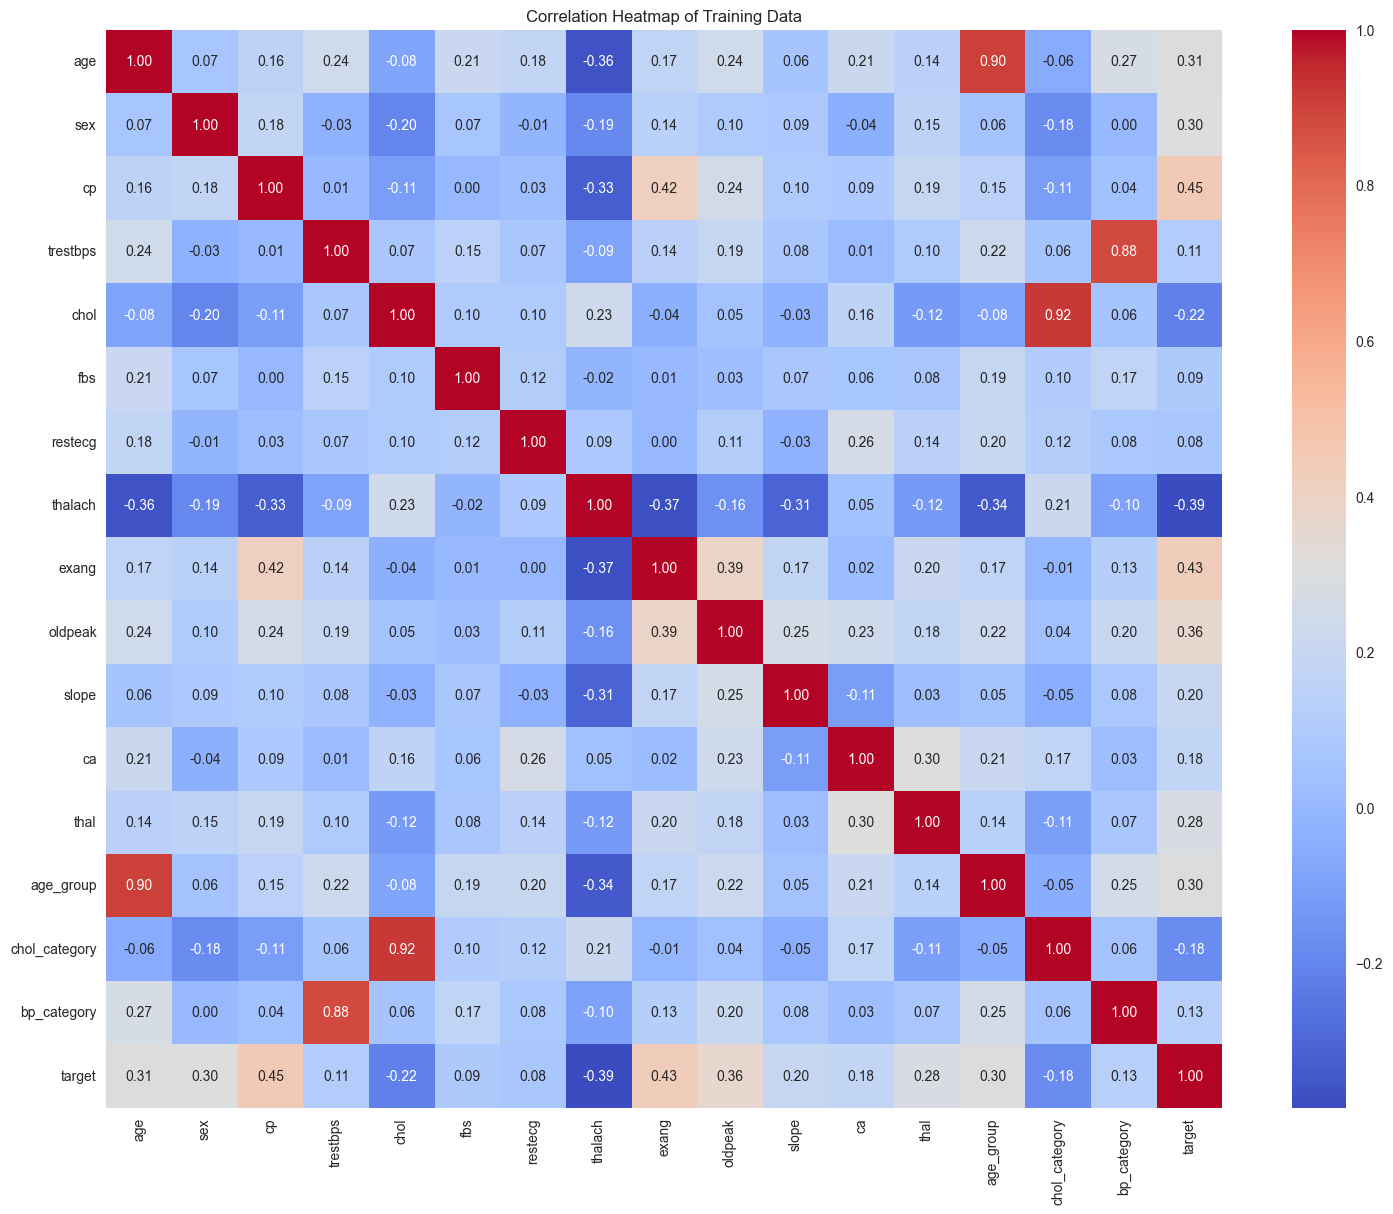

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a temporary dataframe for the heatmap
train_df_for_plot = X_train.copy()
train_df_for_plot['target'] = y_train

# Calculate the correlation matrix
corr_matrix = train_df_for_plot.corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Training Data')
plt.show()

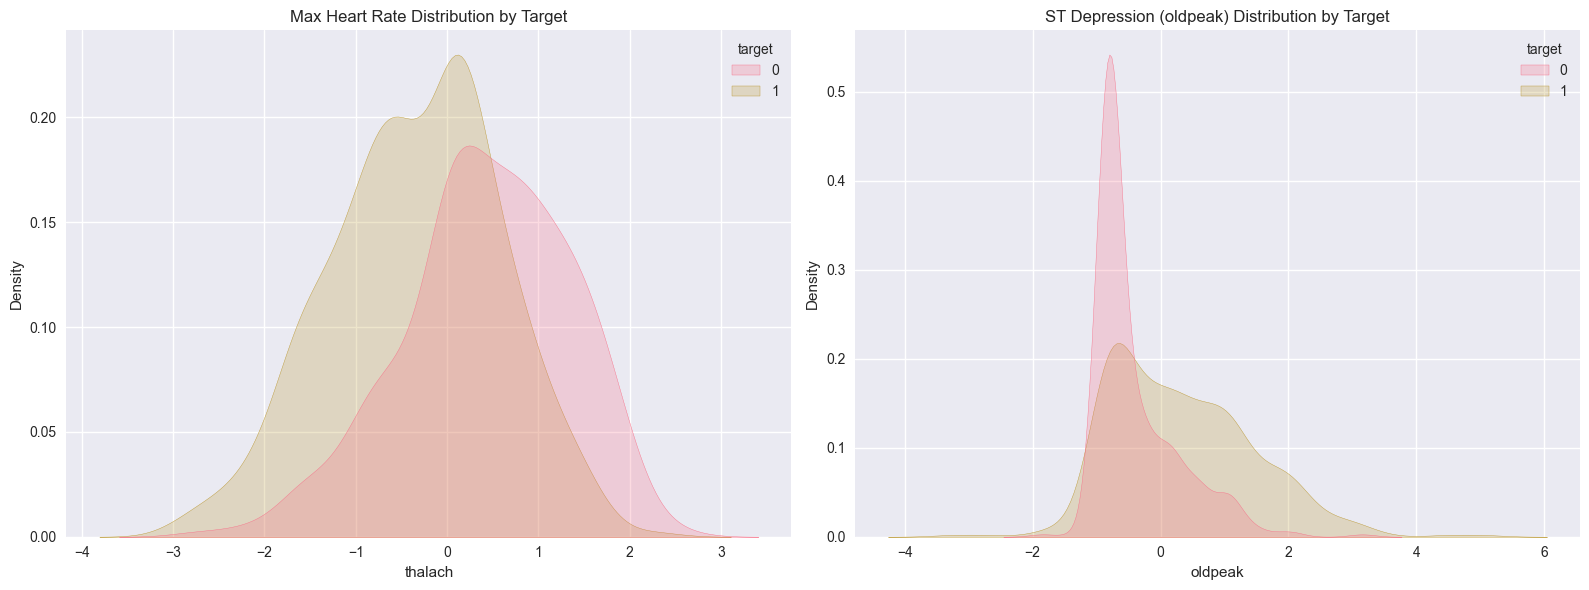

In [17]:
# Set up the figure for plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'thalach' (Maximum Heart Rate)
sns.kdeplot(data=train_df_for_plot, x='thalach', hue='target', fill=True, ax=axes[0])
axes[0].set_title('Max Heart Rate Distribution by Target')

# Plot for 'oldpeak' (ST Depression)
sns.kdeplot(data=train_df_for_plot, x='oldpeak', hue='target', fill=True, ax=axes[1])
axes[1].set_title('ST Depression (oldpeak) Distribution by Target')

plt.tight_layout()
plt.show()

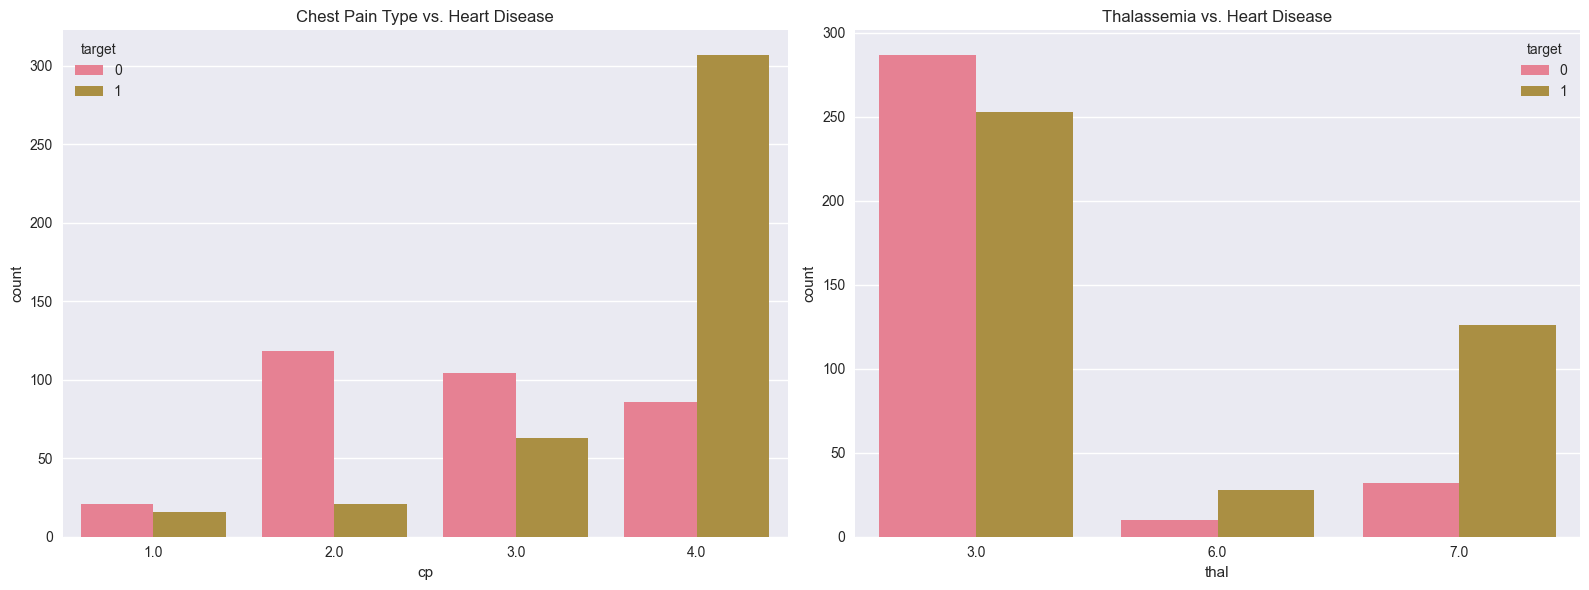

In [18]:
# Set up the figure for plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'cp' (Chest Pain Type)
sns.countplot(data=train_df_for_plot, x='cp', hue='target', ax=axes[0])
axes[0].set_title('Chest Pain Type vs. Heart Disease')

# Plot for 'thal' (Thalassemia)
sns.countplot(data=train_df_for_plot, x='thal', hue='target', ax=axes[1])
axes[1].set_title('Thalassemia vs. Heart Disease')

plt.tight_layout()
plt.show()

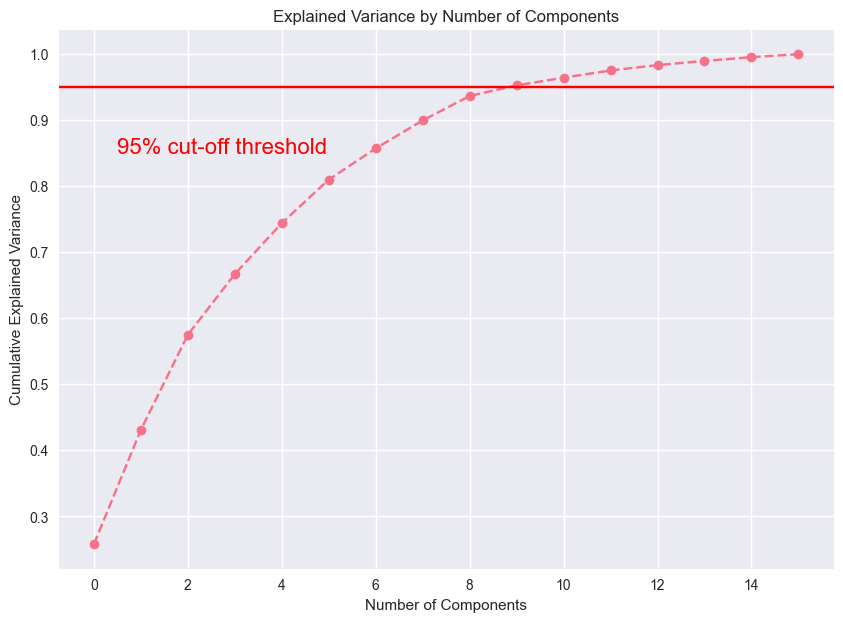

In [19]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA to find the optimal number of components
pca = PCA()

# Fit PCA on the scaled training data
X_train_pca = pca.fit_transform(X_train)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
# Add a horizontal line at 95% variance
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

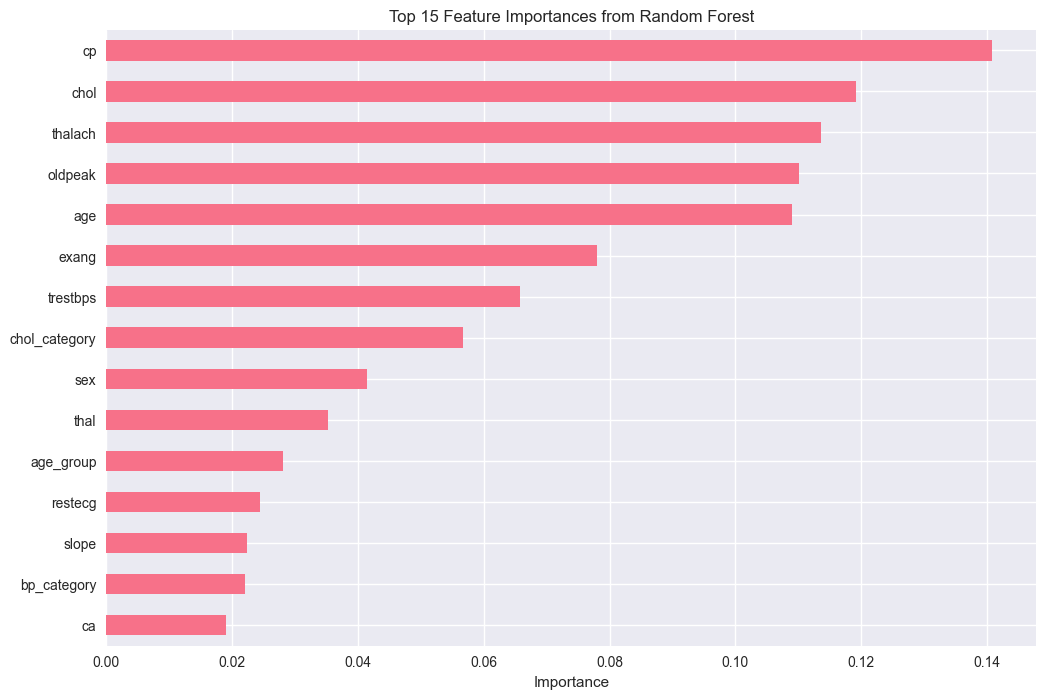

In [20]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize and train a Random Forest model
# We use the scaled training data (X_train, y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot the top 15 most important features
plt.figure(figsize=(12, 8))
importances.nlargest(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.show()

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize a simple model for RFE
# Logistic Regression is a good choice because it's fast
log_reg = LogisticRegression(max_iter=1000)

# Initialize RFE to select the top 10 features
# You can change n_features_to_select to your desired number
rfe = RFE(estimator=log_reg, n_features_to_select=10, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the names of the selected features
selected_features = X_train.columns[rfe.support_]

print("The 10 features selected by RFE are:")
print(list(selected_features))

The 10 features selected by RFE are:
['sex', 'cp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'age_group']


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.79      0.74      0.77        82
           1       0.80      0.84      0.82       102

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.80       184
weighted avg       0.80      0.80      0.80       184

ROC AUC Score: 0.8870
-------------------------
--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        82
           1       0.75      0.75      0.75       102

    accuracy                           0.72       184
   macro avg       0.71      0.71      0.71       184
weighted avg       0.72      0.72      0.72       184

ROC AUC Score: 0.7140
-------------------
--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        82
           1       0.79      0.87      0.83       102

    accuracy        

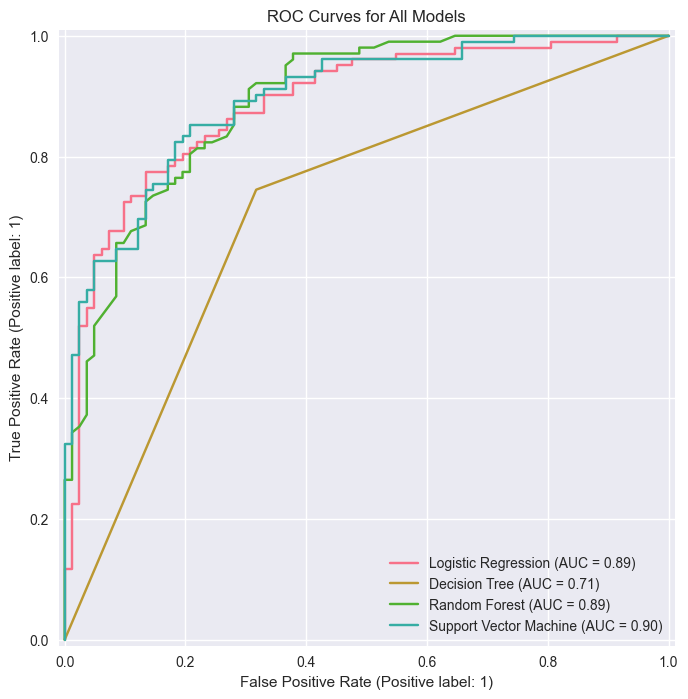

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# IMPORTANT: Use the list of feature names you got from RFE in the last step
# Replace these with your actual selected features if they are different
selected_features = ['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create new DataFrames with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Define the models you want to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True is needed for ROC curve
}

# Loop through the models, train and evaluate them
for name, model in models.items():
    print(f"--- {name} ---")

    # Train the model
    model.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_selected)

    # Print evaluation metrics
    print(classification_report(y_test, y_pred))
    # Note: For roc_auc_score, we need prediction probabilities
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("-"*(len(name) + 6))

# Plot ROC curves for all models
fig, ax = plt.subplots(figsize=(10, 8))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test_selected, y_test, name=name, ax=ax)

plt.title("ROC Curves for All Models")
plt.grid(True)
plt.show()

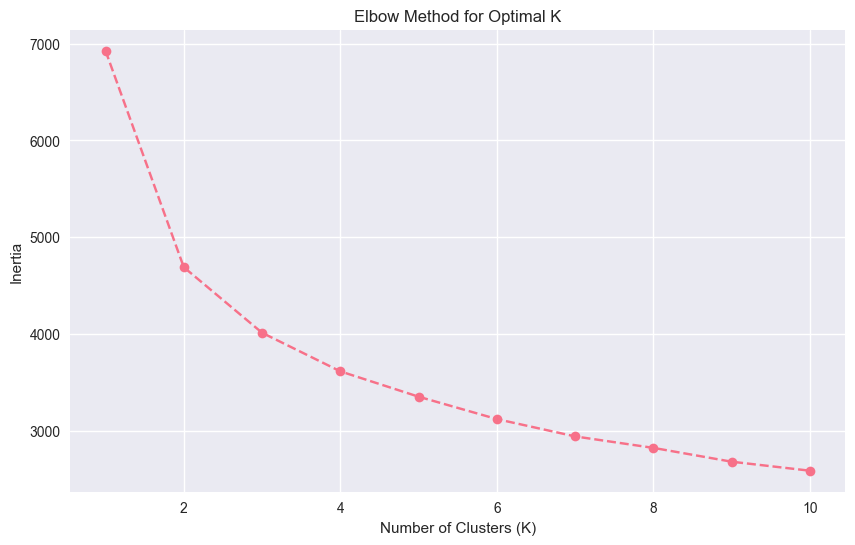

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We will use the feature-selected training data
# X_train_selected is from the previous step

# Find the optimal K using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_selected)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

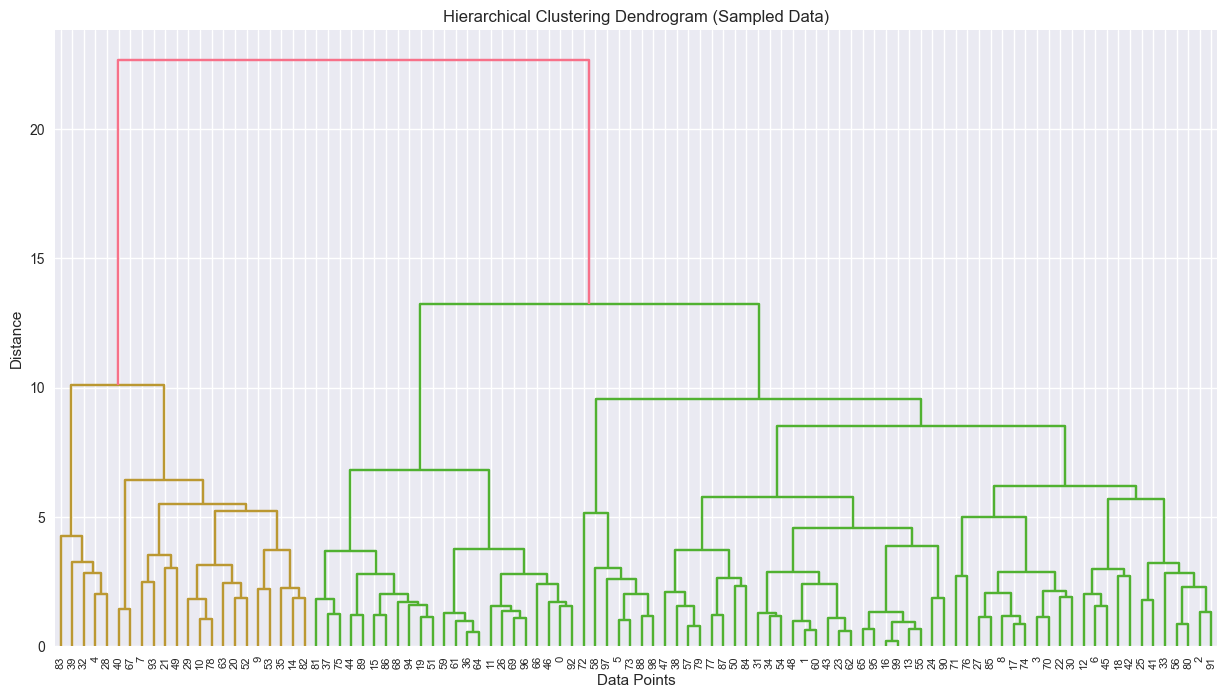

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

# Take a sample of the data to make the dendrogram readable
X_sample = X_train_selected.sample(n=100, random_state=42)

# Generate the linkage matrix
Z = linkage(X_sample, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# We will tune the Support Vector Machine (SVM)
# using the feature-selected training data (X_train_selected)

# 1. Define the grid of parameters to search
# These are some of the most important hyperparameters for an SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient
    'kernel': ['rbf'] # Using the Radial Basis Function kernel is common
}

# 2. Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='roc_auc' tells it to find the parameters that maximize the AUC score
grid_search = GridSearchCV(estimator=SVC(probability=True, random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=-1) # n_jobs=-1 uses all available CPU cores

# 3. Run the search
print("Starting GridSearchCV... This may take a few minutes.")
grid_search.fit(X_train_selected, y_train)

# 4. Print the best parameters found
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# 5. Print the best score achieved during the search
print(f"\nBest ROC AUC score during cross-validation: {grid_search.best_score_:.4f}")

Starting GridSearchCV... This may take a few minutes.
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found by GridSearchCV:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Best ROC AUC score during cross-validation: 0.8776


--- Final Model Evaluation on Test Data ---
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        82
           1       0.80      0.88      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184

Final ROC AUC Score: 0.8984

--- Confusion Matrix ---


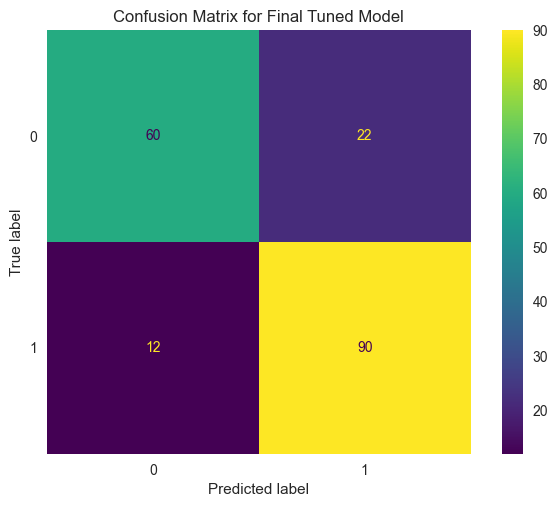

In [26]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# 1. Get the best model from the grid search
best_model = grid_search.best_estimator_

# 2. Make predictions on the test data
y_pred_final = best_model.predict(X_test_selected)
y_pred_proba_final = best_model.predict_proba(X_test_selected)[:, 1]

# 3. Print the final evaluation metrics
print("--- Final Model Evaluation on Test Data ---")
print(classification_report(y_test, y_pred_final))
print(f"Final ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_final):.4f}")

# 4. Display the confusion matrix
print("\n--- Confusion Matrix ---")
ConfusionMatrixDisplay.from_estimator(best_model, X_test_selected, y_test)
plt.title("Confusion Matrix for Final Tuned Model")
plt.grid(False)
plt.show()

In [29]:
import joblib
import os

# Your final list of features selected by RFE
selected_features = ['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# The original list of all numerical columns
original_numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Find which of the original numerical columns are in your final feature list
final_numerical_cols = [col for col in original_numerical_cols if col in selected_features]

print(f"Numerical columns to be scaled: {final_numerical_cols}")

# --- Re-fit and Save the Scaler ---
from sklearn.preprocessing import StandardScaler

# Initialize a NEW scaler
final_scaler = StandardScaler()

# Fit it ONLY on the final selected numerical columns of the training data
final_scaler.fit(X_train[final_numerical_cols])

# Save this new, correct scaler
os.makedirs('models', exist_ok=True)
joblib.dump(final_scaler, 'models/scaler.pkl')

print("\n✅ New scaler has been saved successfully!")

Numerical columns to be scaled: ['age', 'trestbps', 'thalach', 'oldpeak', 'ca']

✅ New scaler has been saved successfully!
